**Importing the libraries**

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


**Loading and Exploring the Dataset**

In [22]:
# Load dataset from scikit-learn
iris = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Showing the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Check for null values
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


**Since it's a clean built-in dataset, no missing values are expected.**

In [24]:
# The target column is already encoded as integers (0, 1, 2)
# If needed, map back to names for reference
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Split Data into Train and Test Sets**

In [25]:
# Features and target
X = df[iris.feature_names]
y = df['target']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Decision Tree Classifier**

In [26]:
# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
# Predict on test data
y_pred = clf.predict(X_test)


**Evaluating the Model**

In [28]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualizing the Decision Tree**

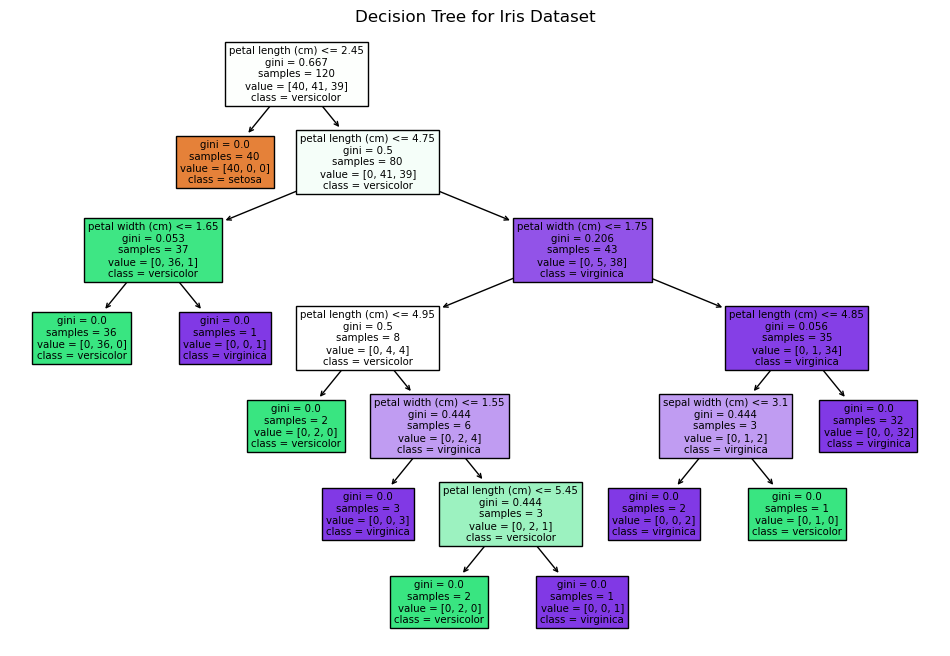

In [19]:
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names.tolist(),  # Convert to list
          filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()
